In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Obesity Classification.csv")

In [3]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
data.shape

(108, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [6]:
# check missing values
data.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

**Part 1**

In [7]:
# statistical values

data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


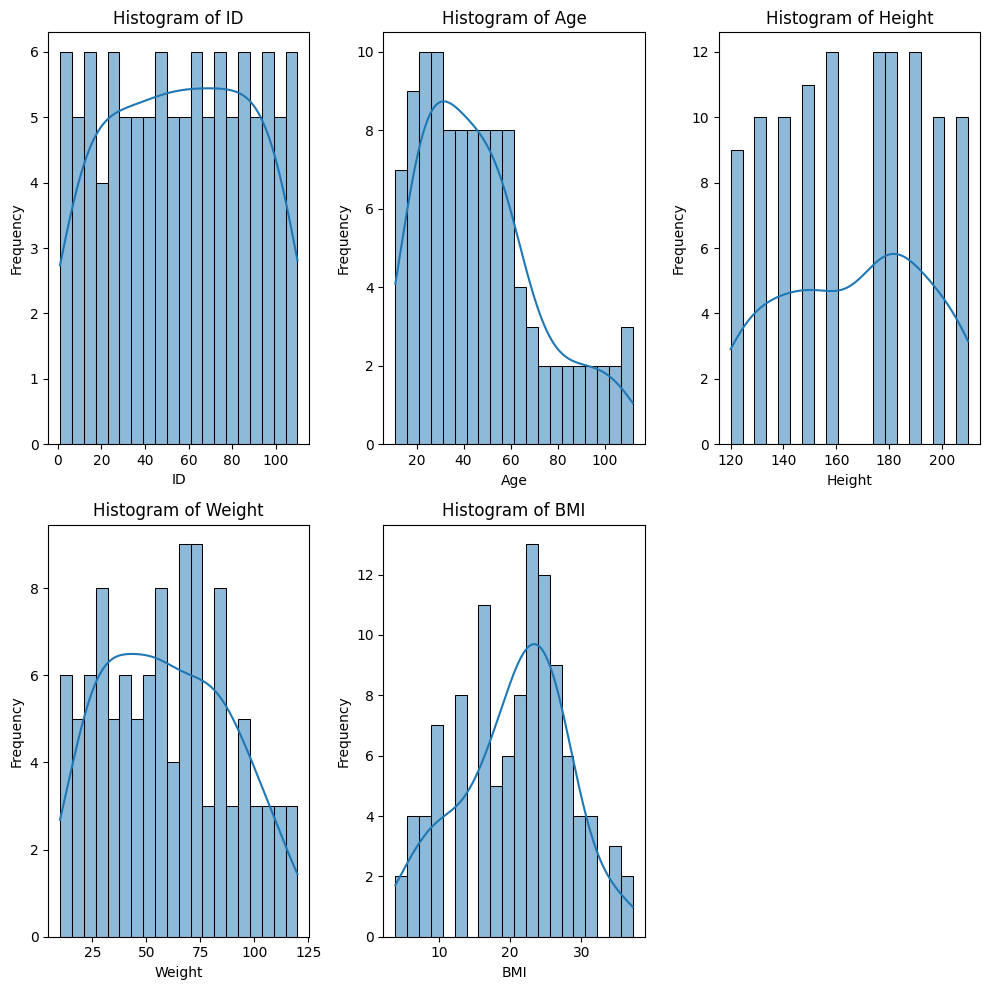

In [8]:
# histogram

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=data, x=column, ax=ax, bins=20, kde=True)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

if len(numerical_columns) % num_cols != 0:
    for i in range(len(numerical_columns), num_rows * num_cols):
       fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

There are no missing values in the dataset.

Looking at the histogams, we can say that there are not much outliers so, we can just ignore them.


In [9]:
from sklearn.preprocessing import LabelEncoder

data.drop(['ID'], axis=1, inplace=True)

encoder = LabelEncoder()
data['Label'] =encoder.fit_transform(data['Label'])
data["Gender"]=encoder.fit_transform(data["Gender"])

For the categorial attributes - Label and Gender, I have used label encoding to convert them into numerical format.

In [10]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


**Part 2**

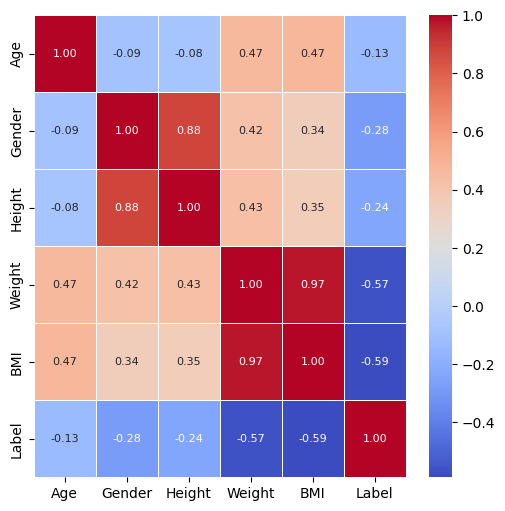

,Age,Gender,Height,Weight,BMI,Label
Age,1.000000,-0.091964,-0.076896,0.465106,0.474185,-0.134396
Gender,-0.091964,1.000000,0.876225,0.418415,0.342342,-0.281647
Height,-0.076896,0.876225,1.000000,0.428890,0.354340,-0.237683
Weight,0.465106,0.418415,0.428890,1.000000,0.972829,-0.565555
BMI,0.474185,0.342342,0.354340,0.972829,1.000000,-0.589237
Label,-0.134396,-0.281647,-0.237683,-0.565555,-0.589237,1.000000


In [11]:
# Calculate the Pearson Correlation Coefficient (PCC)

correlations = data.corr(numeric_only=True)
plt.figure(figsize=(6, 6))
sns.heatmap(correlations, annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()
correlations

In [12]:
#Checking the correlation with the target attribute

target_attribute = 'Label'
correlation_with_target = data.corr(numeric_only=True)[target_attribute].sort_values(ascending=False)
correlation_with_target

Label     1.000000
Age      -0.134396
Height   -0.237683
Gender   -0.281647
Weight   -0.565555
BMI      -0.589237
Name: Label, dtype: float64

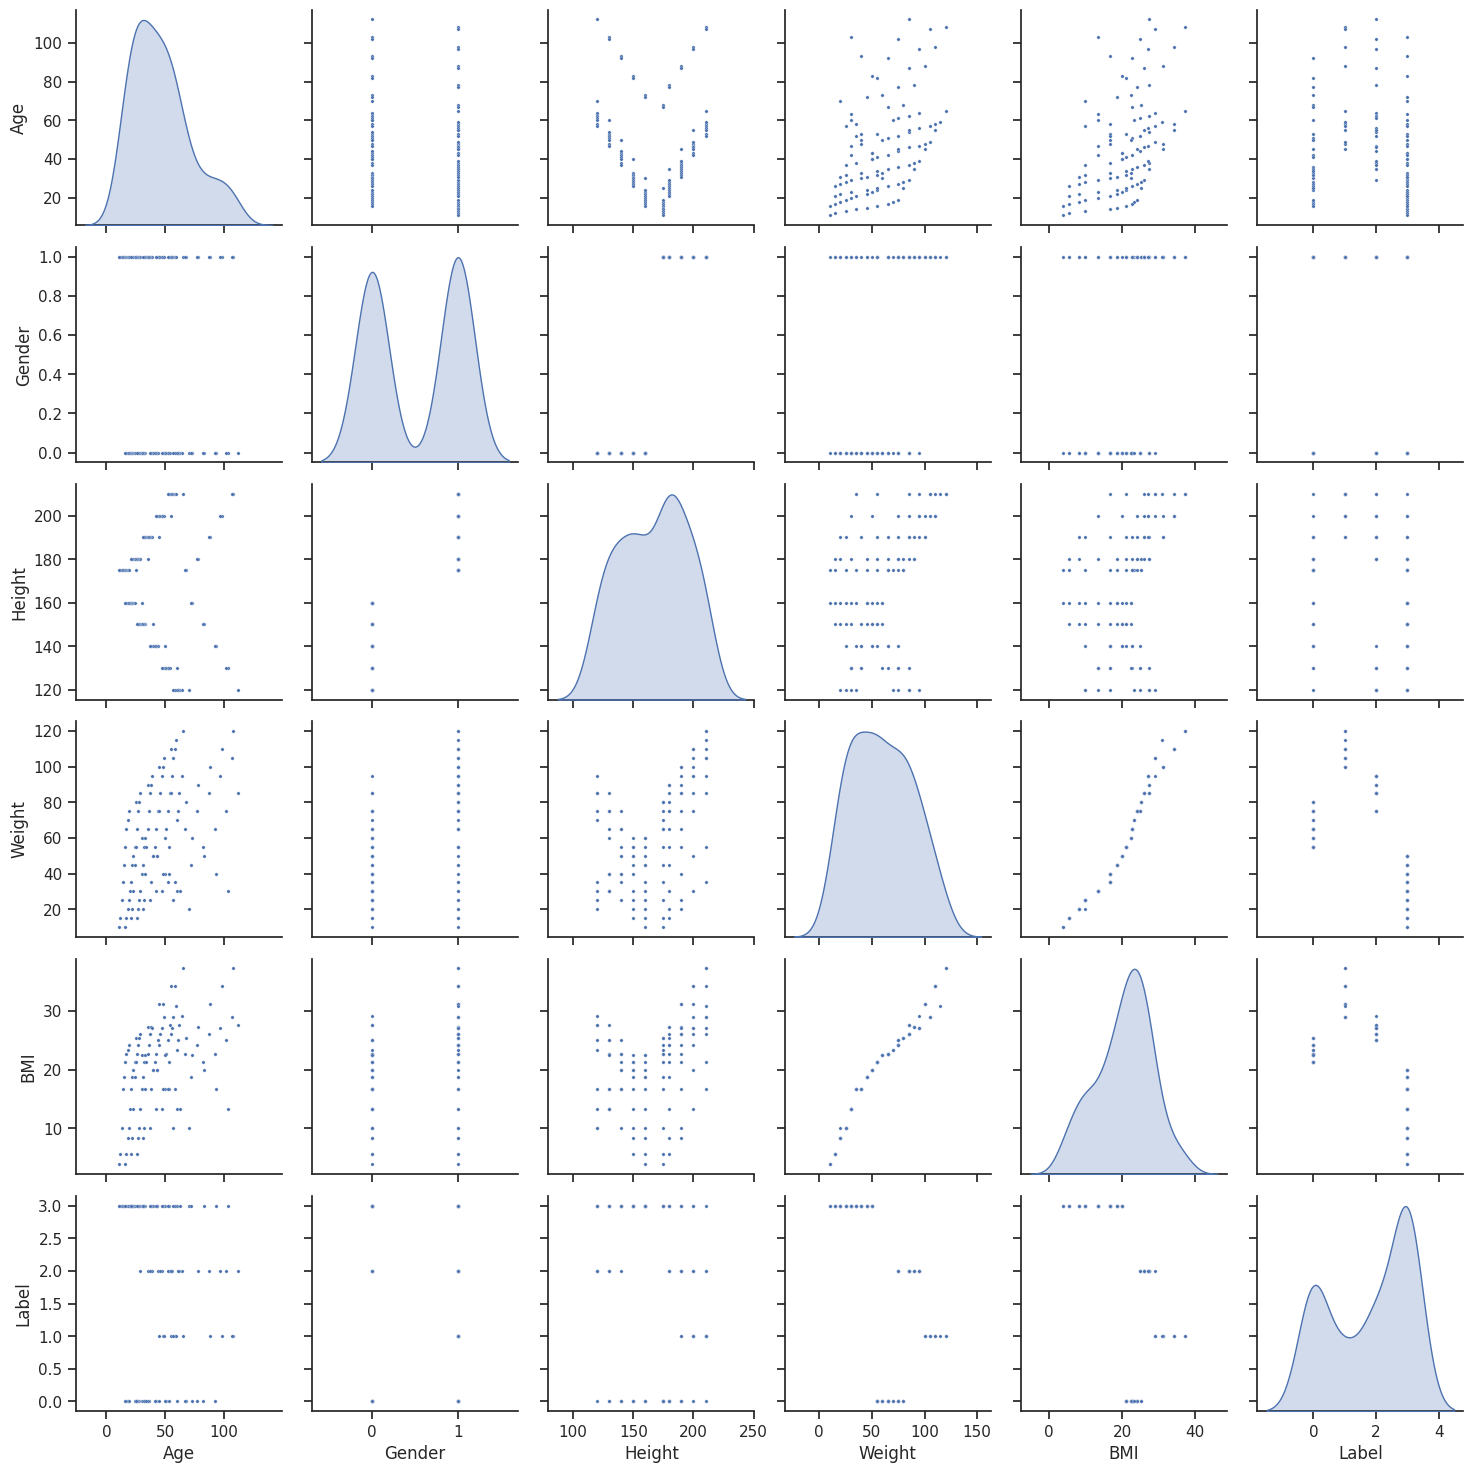

In [14]:
# Creating scatterplots

sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o", plot_kws={"s": 6}, height=2.5)
plt.show()

From the PCC, the attributes weight and BMI have high correlation among each other.

Also, compared to the other attributes, weight and BMI have strong correlation with Label.

**Part 3**

In [15]:
df = data.copy()

In [16]:
X = df.iloc[: , :5]
y = df['Label']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the remaining data into validation (20%) and testing (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
# Verification of splitting

df.describe()

,Age,Gender,Height,Weight,BMI,Label
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,46.555556,0.518519,166.574074,59.490741,20.549074,1.787037
std,24.720620,0.501986,27.873615,28.856233,7.583818,1.260848
min,11.000000,0.000000,120.000000,10.000000,3.900000,0.000000
25%,27.000000,0.000000,140.000000,35.000000,16.700000,0.000000
50%,42.500000,1.000000,175.000000,55.000000,21.200000,2.000000
75%,59.250000,1.000000,190.000000,85.000000,26.100000,3.000000
max,112.000000,1.000000,210.000000,120.000000,37.200000,3.000000


In [19]:
X_train.describe()

,Age,Gender,Height,Weight,BMI
count,64.000000,64.000000,64.0000,64.00000,64.000000
mean,46.828125,0.500000,165.6250,55.62500,19.709375
std,24.337283,0.503953,27.0728,27.17521,7.180457
min,12.000000,0.000000,120.0000,10.00000,3.900000
25%,29.500000,0.000000,147.5000,35.00000,16.700000
50%,41.500000,0.500000,167.5000,55.00000,21.200000
75%,60.750000,1.000000,190.0000,75.00000,24.200000
max,112.000000,1.000000,210.0000,120.00000,37.200000


In [20]:
X_val.describe()

,Age,Gender,Height,Weight,BMI
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,48.090909,0.454545,162.727273,68.181818,22.340909
std,21.734127,0.509647,31.912353,32.570270,8.860165
min,11.000000,0.000000,120.000000,10.000000,3.900000
25%,32.500000,0.000000,140.000000,42.500000,17.525000
50%,47.500000,0.000000,155.000000,75.000000,25.000000
75%,58.750000,1.000000,197.500000,92.500000,27.375000
max,98.000000,1.000000,210.000000,115.000000,34.200000


By comparing the statistical values of the training and validation sets with the entire dataset, we can say that both the training and validation sets are representative of the entire datasets as there is not much difference seen in the mean, standard deviation etc. values.

**Part 4**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [23]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [24]:
# Softmax Regression

softmax_reg = LogisticRegression()
softmax_params = {'multi_class': ["multinomial"], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'], 'max_iter': [100, 200]}
softmax_grid = GridSearchCV(softmax_reg, softmax_params, cv=4, refit=True)
softmax_grid.fit(X_train, y_train)
softmax_best = softmax_grid.best_estimator_

softmax_train = evaluate(softmax_best, X_train, y_train)
softmax_val = evaluate(softmax_best, X_val, y_val)
softmax_test = evaluate(softmax_best, X_test, y_test)

print(softmax_best)

LogisticRegression(C=100, multi_class='multinomial', solver='newton-cg')


In [25]:
print(softmax_train)
print(softmax_val)
print(softmax_test)

(1.0, 1.0, 1.0, 1.0)
(0.8636363636363636, 0.922077922077922, 0.8636363636363636, 0.859504132231405)
(0.8636363636363636, 0.922077922077922, 0.8636363636363636, 0.8719443236189648)


In [36]:
# Support Vector Machine

svm = SVC(probability=True)
svm_params = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'] + [0.1, 1, 10]}
svm_grid = GridSearchCV(svm, svm_params, cv=4, refit=True)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

svm_train = evaluate(svm_best, X_train, y_train)
svm_val = evaluate(svm_best, X_val, y_val)
svm_test = evaluate(svm_best, X_test, y_test)

print(svm_best)

SVC(C=100, degree=2, probability=True)


In [37]:
print(svm_train)
print(svm_val)
print(svm_test)

(1.0, 1.0, 1.0, 1.0)
(0.8636363636363636, 0.922077922077922, 0.8636363636363636, 0.859504132231405)
(0.9090909090909091, 0.9246753246753247, 0.9090909090909091, 0.904592483539852)


In [29]:
# Random Forest

rf_classifier = RandomForestClassifier()
rf_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=4, refit=True)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

rf_train = evaluate(rf_best, X_train, y_train)
rf_val = evaluate(rf_best, X_val, y_val)
rf_test = evaluate(rf_best, X_test, y_test)

print(rf_best)

RandomForestClassifier(max_depth=20, min_samples_split=5)


In [30]:
print(rf_train)
print(rf_val)
print(rf_test)

(1.0, 1.0, 1.0, 1.0)
(0.8636363636363636, 0.922077922077922, 0.8636363636363636, 0.859504132231405)
(0.9545454545454546, 0.9636363636363636, 0.9545454545454546, 0.9550045913682278)


BMI: 0.46046
Height: 0.40855
Weight: 0.05935
Age: 0.05855
Gender: 0.01310


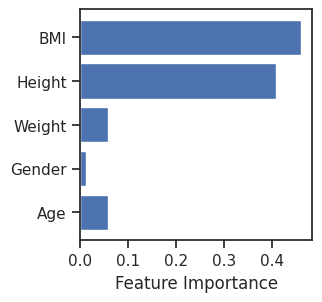

In [31]:
# Feature Importance

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

features = ['Age', 'Gender', 'Weight', 'Height', 'BMI']

sorted_feature = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature:
    print(f"{feature}: {importance:.5f}")

plt.figure(figsize=(3, 3))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=features)
plt.xlabel('Feature Importance')
plt.show()


**Part 5**

In [38]:
# Hard voting for validation set

from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', softmax_best),
    ('svm', svm_best),
    ('random_forest', rf_best)
], voting='hard')


ensemble_classifier.fit(X_train, y_train)

y_pred_ensemble = ensemble_classifier.predict(X_val)

accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)
precision_ensemble = precision_score(y_val, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_val, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_val, y_pred_ensemble, average='weighted')

print("Ensemble Validation Accuracy:", accuracy_ensemble)
print("Ensemble Validation Precision:", precision_ensemble)
print("Ensemble Validation Recall:", recall_ensemble)
print("Ensemble Validation F1 Score:", f1_ensemble)

Ensemble Validation Accuracy: 0.8636363636363636
Ensemble Validation Precision: 0.922077922077922
Ensemble Validation Recall: 0.8636363636363636
Ensemble Validation F1 Score: 0.859504132231405


In [39]:
# Hard voting for testing set

ensemble_classifier.fit(X_train, y_train)

y_pred_ensemble = ensemble_classifier.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')

print("Ensemble Test Accuracy:", accuracy_ensemble)
print("Ensemble Test Precision:", precision_ensemble)
print("Ensemble Test Recall:", recall_ensemble)
print("Ensemble Test F1 Score:", f1_ensemble)

Ensemble Test Accuracy: 0.9090909090909091
Ensemble Test Precision: 0.9393939393939393
Ensemble Test Recall: 0.9090909090909091
Ensemble Test F1 Score: 0.9149195302305351


In [40]:
# Soft voting for validation set

ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', softmax_best),
    ('svm', svm_best),
    ('random_forest', rf_best)
], voting='soft')


ensemble_classifier.fit(X_train, y_train)

y_pred_ensemble = ensemble_classifier.predict(X_val)

accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)
precision_ensemble = precision_score(y_val, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_val, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_val, y_pred_ensemble, average='weighted')

print("Ensemble Validation Accuracy:", accuracy_ensemble)
print("Ensemble Validation Precision:", precision_ensemble)
print("Ensemble Validation Recall:", recall_ensemble)
print("Ensemble Validation F1 Score:", f1_ensemble)

Ensemble Validation Accuracy: 0.8636363636363636
Ensemble Validation Precision: 0.922077922077922
Ensemble Validation Recall: 0.8636363636363636
Ensemble Validation F1 Score: 0.859504132231405


In [41]:
# Soft voting for test set

ensemble_classifier.fit(X_train, y_train)

y_pred_ensemble = ensemble_classifier.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')

print("Ensemble Test Accuracy:", accuracy_ensemble)
print("Ensemble Test Precision:", precision_ensemble)
print("Ensemble Test Recall:", recall_ensemble)
print("Ensemble Test F1 Score:", f1_ensemble)

Ensemble Test Accuracy: 0.9545454545454546
Ensemble Test Precision: 0.9636363636363636
Ensemble Test Recall: 0.9545454545454546
Ensemble Test F1 Score: 0.9550045913682278


1. The dataset is divided into 60% training, 20% validation, and 20% test set. 3 different types of classification models(softmax regression, Support Vector Machine, and Random forest classifier) are used for the dataset and accuracy, precision, recall, and f1-score are calculated for the training, validation, and test sets.
The models were also tuned with different hyperparameters using Gridsearch which helps in finding the best hyperparameters for each model.

2. For all the classifiers, the training data has 100% accuracy which can be due to the fact that the datset is too small.

3. In case of Softmax Regression, the best hyperparameters are "LogisticRegression(C=100, multi_class='multinomial', solver='newton-cg')". The validation and testing set results are almost similar. Though with different hyperparameters, the model is overfitting because the validation and testing accuracy is less than the training accuracy.

4. Support Vector Machine produced really good results for the dataset with these hyperparameters "SVC(C=100, degree=2, probability=True)".

5. In the case of Random Forest, compared to other models, here the model is not overfitting on large amount. Also, the validation set has almost similar results for all 3 models.

6. After training the above 3 classifiers, I have performed ensemble learning(both hard voting classifier and soft voting classifier) on the validation and test set. For both the soft and hard voting, the validation set has same results. The testing set performs well for soft voting as compared to hard voting.



References -

1. datset - https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset/data

2. Book - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

3. https://www.youtube.com/watch?v=pAzkdQazqJY&list=PL-u09-6gP5ZPOfSPTto4BIDwky-8aP4rQ&index=2

4. https://chat.openai.com/
